In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

Problem 2.1. In a coin-tossing game, guess how often the lead changes in a game of N tosses. If A leads at toss N, when was previous lead change most likely to be? How large is the lead typically?

In [3]:
def singlegame(N):
    '''Simulates one game of N turns.'''
    A=0
    B=0
    leader=[]
    changes=0
    tosses=np.random.random_integers(0,1,N)
    for t in tosses:
        if t==0:
            A+=1
        elif t==1:
            B+=1
        if A>B:
            if len(leader)>1:
                if leader[-1]!='A':
                    changes+=1
            leader.append('A')
        elif B>A:
            if len(leader)>1:
                if leader[-1]!='B':
                    changes+=1
            leader.append('B')
        else:
            leader.append(leader[-1])
    lastchange=0
    revlead=leader[::-1]
    winner=revlead[0]
    for i in range(N):
        if revlead[i]==winner:
            lastchange+=1
        else:
            break
    return leader, changes, lastchange, np.abs(A-B)

In [4]:
def averagegame(N, M):
    '''Simulates M games of N turns.'''
    total_changes=[]
    previous_changes=[]
    average_leads=[]
    for i in range(M):
        game=singlegame(N)
        total_changes.append(game[1])
        previous_changes.append(game[2])
        average_leads.append(game[3])
    return [np.mean(total_changes), np.std(total_changes)], [np.mean(previous_changes), np.std(previous_changes)], [np.mean(average_leads), np.std(average_leads)]

In [5]:
sim1=averagegame(2000, 100)
sim2=averagegame(2000, 1000)
sim3=averagegame(2000, 10000)

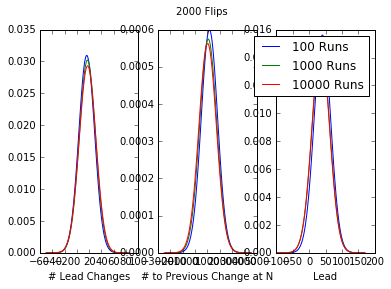

In [6]:
f, axs=plt.subplots(1,3)
xs=[]
for i in range(3):
    x1=np.linspace(sim1[i][0]-5*sim1[i][1], sim1[i][0]+5*sim1[i][1], 100)
    axs[i].plot(x1, mlab.normpdf(x1, sim1[i][0], sim1[i][1]), label='100 Runs')
    x2=np.linspace(sim2[i][0]-5*sim2[i][1], sim2[i][0]+5*sim2[i][1], 100)
    axs[i].plot(x2, mlab.normpdf(x2, sim2[i][0], sim2[i][1]), label='1000 Runs')
    x3=np.linspace(sim3[i][0]-5*sim3[i][1], sim3[i][0]+5*sim3[i][1], 100)
    axs[i].plot(x3, mlab.normpdf(x3, sim3[i][0], sim3[i][1]), label='10000 Runs')
axs[0].set_xlabel('# Lead Changes')
axs[1].set_xlabel('# to Previous Change at N')
axs[2].set_xlabel('Lead')
axs[2].legend()
f.suptitle('2000 Flips')
plt.show()

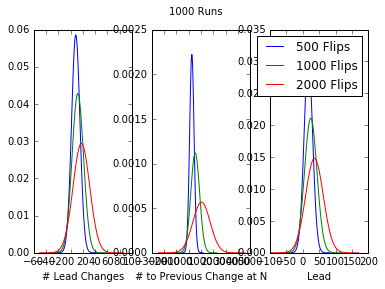

In [7]:
sim1=averagegame(500, 1000)
sim2=averagegame(1000, 1000)
sim3=averagegame(2000, 1000)
f, axs=plt.subplots(1,3)
xs=[]
for i in range(3):
    x1=np.linspace(sim1[i][0]-5*sim1[i][1], sim1[i][0]+5*sim1[i][1], 100)
    axs[i].plot(x1, mlab.normpdf(x1, sim1[i][0], sim1[i][1]), label='500 Flips')
    x2=np.linspace(sim2[i][0]-5*sim2[i][1], sim2[i][0]+5*sim2[i][1], 100)
    axs[i].plot(x2, mlab.normpdf(x2, sim2[i][0], sim2[i][1]), label='1000 Flips')
    x3=np.linspace(sim3[i][0]-5*sim3[i][1], sim3[i][0]+5*sim3[i][1], 100)
    axs[i].plot(x3, mlab.normpdf(x3, sim3[i][0], sim3[i][1]), label='2000 Flips')
axs[0].set_xlabel('# Lead Changes')
axs[1].set_xlabel('# to Previous Change at N')
axs[2].set_xlabel('Lead')
axs[2].legend()
f.suptitle('1000 Runs')
plt.show()

Problem 2.2. Show that if you wait 5 nights, then choose first night better than the first 5, you have 25% chance it is the best night. Show that the optimum length of training sample is 1/e of total sample.

In [11]:
def observing_run(sample_size=5, total_number=10):
    '''Checks whether or not the proposed method succeeds.'''
    
    
    ten_nights=np.random.random_integers(0,7,total_number)
    #ten_nights=np.random.choice(range(total_number),total_number, replace=False)
    for i, n in enumerate(ten_nights[sample_size:]):
        if i!=len(ten_nights[sample_size:]):
            if n>=np.any(ten_nights[:sample_size]):
                choice=n
                break
        if i==len(ten_nights[sample_size:]):
            choice=n
    #print(ten_nights, choice)
    try:
        if choice==ten_nights.max():
            return(1)
            #print(1)
    except UnboundLocalError:
        print(ten_nights)
    else:
        return(0)
        #print(0)
def many_runs(N, sample_size=5, total_number=10):
    '''Simulates N observing runs, returning the success rate of the method.'''
    successes=[]
    for i in range(N):
        successes.append(observing_run(sample_size, total_number))
    return np.array(successes).mean()
def optimal_training(N, total_number):
    trial0=0
    trials=[]
    for i in range(100):
        rate=many_runs(N, sample_size=i,total_number=total_number)
        print(rate)
        if rate>trial0:
            trial0=rate
            trials.append(trial0)
        if rate<trial0:
            trial0=rate
            trials.append(trial0)

In [9]:
observing_run(5,10)

[6 4 1 4 6 5 0 4 6 1] 5


0

In [12]:
success_rate=many_runs(10000, 5 ,10)

In [13]:
success_rate

0.1988

In [375]:
opt=optimal_training(10000, 50)

0.1281
0.1472
0.1449
0.1462
0.1443
0.1508
0.1467
0.1505
0.1455
0.1357
0.1415
0.1452
0.1398
0.1398
0.146
0.1438
0.1368
0.1434
0.1444
0.1402
0.1449
0.1444
0.1449
0.1439
0.1355
0.142
0.144
0.1426
0.1394


KeyboardInterrupt: 

In [344]:
np.max(opt)